#Lab 2. Data analysis with Pandas
##варіант 3

###Завантаження датасету


##1)Яка кількість спостережень ( samples , рядків)? Кількість ознак ( features , стовпців)? Чи всі дані повні? Які типи стовпців?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
churn_20 = pd.read_csv("/content/drive/MyDrive/churn-bigml-20.csv")
churn_80 = pd.read_csv("/content/drive/MyDrive/churn-bigml-80.csv")

Наш датасет був поділенний на датасети для тренування та тестування моделів машинного навчання, нам треба об'єднати його у один


In [ ]:
churn = pd.concat([churn_20, churn_80])
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Кількість спостережень - 3333, кількість стовпців - 19, типи усіх стовпців ми бачимо зверху


##2)Порівняйте штати Каліфорнія ( CA ) та Нью - Йорк ( NY ) за схильністю користувачів підключати послугу international plan.

In [ ]:
california = churn[churn["State"] == "CA"]["International plan"]
new_york = churn[churn["State"] == "NY"]["International plan"]
print(f"Каліфорнія:\n{california.value_counts()}")
print(f"Нью - Йорк:\n{new_york.value_counts()}")

Каліфорнія:
No     30
Yes     4
Name: International plan, dtype: int64
Нью - Йорк:
No     75
Yes     8
Name: International plan, dtype: int64


Можна побачити, що в нас є більше записів для Нью Йорку, щоб побачити схильність, порахуємо відсотки людей що придбали цю послугу

In [ ]:
print(f"Відсоток у Каліфорнії:{(california.value_counts()['Yes'] / california.value_counts()['No'])}")
print(f"Відсоток у Нью Йорку:{(new_york.value_counts()['Yes'] / new_york.value_counts()['No'])}")


Відсоток у Каліфорнії:0.13333333333333333
Відсоток у Нью Йорку:0.10666666666666667


З цього випливає, що, хоча у Нью - Йорку більше опитуванних, процент тих кто придбав послугу є більшим у Каліфорнії

##3)Яким є розподіл абонентів за цільовою ознакою churn? Візуалізуйте отриману інформацію. Назвіть відсоток лояльних абонентів.

Створимо стовпчату діаграмму

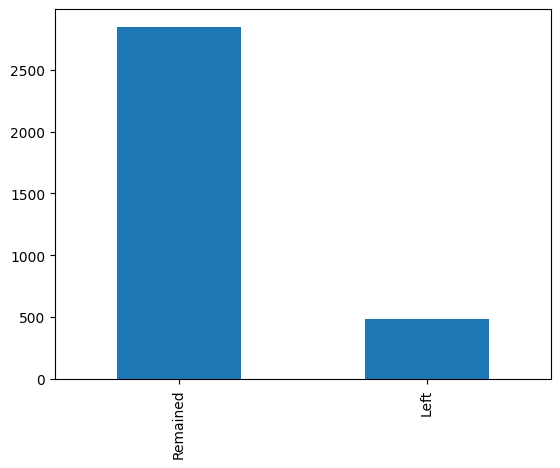

In [ ]:
churn["Churn"].value_counts().plot(kind="bar")
plt.xticks([False, True], ["Remained", "Left"])

plt.show()

Бачимо, що лояльних клієнтів є набагато більше, порахуємо відсоток


In [ ]:
print(f"Процент лояльних клієнтів:\n{1 - churn['Churn'].mean()}")

Процент лояльних клієнтів:
0.8550855085508551


##4)Знайдіть частку лояльних абонентів у кожному штаті. Виведіть топ-5 штатів за лояльністю до нашої компанії.

In [ ]:
churn_by_state = churn[churn["Churn"] == False].groupby("State")["Churn"].agg("count").sort_values(ascending=False).nlargest(5)
churn_by_state

State
WV    96
VA    72
AL    72
WI    71
MN    69
Name: Churn, dtype: int64

##5)Розглянемо ознаку account length (час користування обліковим записом). Яке а) мінімальне; б) максимальне; в) медіанне; г) середнє значення часу користування? Побудуйте гістограму цього стовпця, кількість bins підберіть експериментально.

In [ ]:
print(f"Мінімальний час користування:{churn['Account length'].min()}")
print(f"Максимальний час користування:{churn['Account length'].max()}")
print(f"Медіанний час користування:{churn['Account length'].median()}")
print(f"Середній час користування:{churn['Account length'].mean()}")

Мінімальний час користування:1
Максимальний час користування:243
Медіанний час користування:101.0
Середній час користування:101.06480648064806


Гістограмма

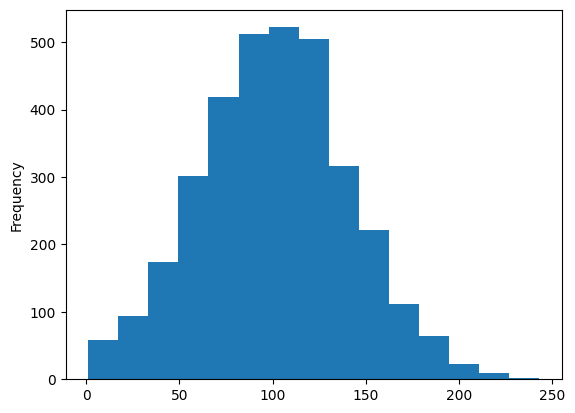

In [ ]:
churn["Account length"].plot(kind="hist", bins=15)
plt.show()

Бачимо, що розподіл цієї величини є нормальним

##6)Жителі якого штату розмовляють телефоном найбільше? менше всього? Зверніть увагу, що нас цікавлять усі види дзвінків, тобто. нам знадобиться додатковий стовпець, у якому підсумовуватимуться всі дзвінки.

In [ ]:
churn["Total"] = churn.loc[:, ["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes"]].sum(axis=1)
print(f"Штат, мешканці якого більше всього розмовляють телефоном: {churn.groupby('State')['Total'].max().sort_values().nlargest(1)}")
print(f"Штат, мешканці якого меньше всього розмовляють телефоном: {churn.groupby('State')['Total'].min().sort_values().nsmallest(1)}")

Штат, мешканці якого більше всього розмовляють телефоном: State
NY    885.0
Name: Total, dtype: float64
Штат, мешканці якого меньше всього розмовляють телефоном: State
WI    284.3
Name: Total, dtype: float64


##7)Чи вірно, що абоненти, не лояльні до нашої компанії (churn =1) у середньому менше говорять по телефону, ніж лояльні?

In [ ]:
print(f"Середнє значення для нелояльних:{churn[churn['Churn'] == 1]['Total'].mean()}")
print(f"Середнє значення для лояльних:{churn[churn['Churn'] == 0]['Total'].mean()}")
plt.show()

Середнє значення для нелояльних:635.2559006211179
Середнє значення для лояльних:584.5111228070175


Бачимо, що насправді, ті люди, які в середньому довше розмовляють телефоном, більш схильні до уходу

##8)Чи правильно, що люди, які здійснюють багато міжнародних дзвінків, набувають international plan? Подумайте, як візуалізувати цю інформацію.

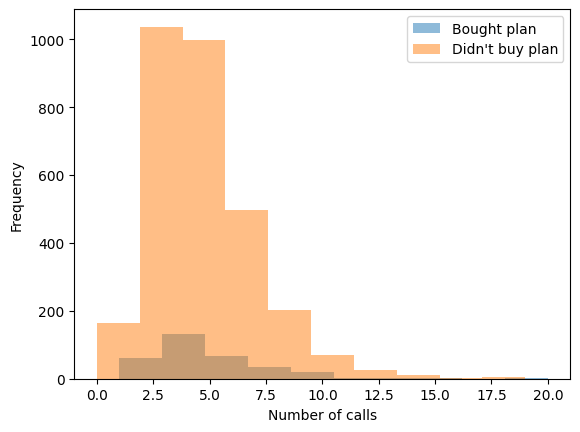

In [ ]:
churn[churn["International plan"] == "Yes"]["Total intl calls"].plot(kind="hist", alpha=0.5, label="Bought plan")
churn[churn["International plan"] == "No"]["Total intl calls"].plot(kind="hist", alpha=0.5, label="Didn't buy plan")
plt.xlabel("Number of calls")
plt.legend()
plt.show()

З цього графіку ми бачимо, що люди, які здійснюють більше міжнародних дзвінків, не схильні до придбання міжнародного плану


##9)Як пов’язані наявність голосової пошти та міжнародного плану з лояльністю абонентів? Спробуйте виказати візуально. Обчисліть лінійний коефіцієнт кореляції ( pd.Series.corr() )

In [ ]:
import seaborn as sns

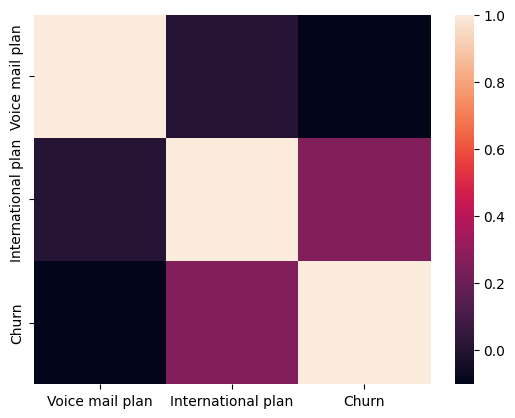

In [ ]:
churn["Voice mail plan"] = churn["Voice mail plan"].map({"Yes" : 1, "No" : 0})
churn["International plan"] = churn["International plan"].map({"Yes" : 1, "No" : 0})
sns.heatmap(churn[["Voice mail plan", "International plan", "Churn"]].corr(method='pearson'))
plt.show()

З цього графіку ми бачимо, що на відтік користувачів більш впливає міжнародний план, план голосової почти майже не впливає

##10)Що можна сказати про взаємозв’язок кількості звернень до кол-центру та лояльності? Не забувайте про візуалізацію інформації.

[]

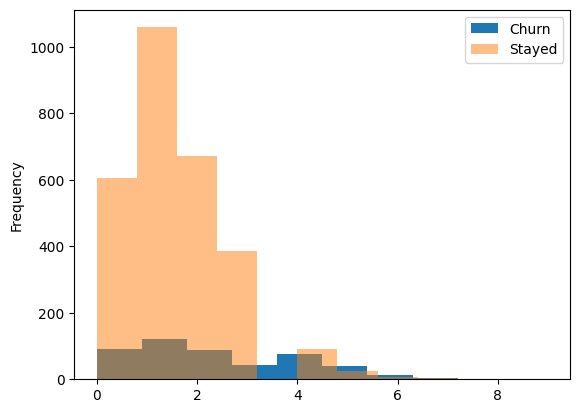

In [ ]:
churn[churn["Churn"] == 1]["Customer service calls"].plot(kind="hist", alpha=1, label="Churn", bins=10)
churn[churn["Churn"] == 0]["Customer service calls"].plot(kind="hist", alpha=0.5, label="Stayed",bins=10)
plt.legend()
plt.plot()

In [ ]:
print(f"Середня кількість дзвінків для нелояльних користувачів:{churn[churn['Churn'] == 1]['Customer service calls'].mean()}")
print(f"Середня кількість дзвінків для лояльних користувачів:{churn[churn['Churn'] == 0]['Customer service calls'].mean()}")

Середня кількість дзвінків для нелояльних користувачів:2.229813664596273
Середня кількість дзвінків для лояльних користувачів:1.4498245614035088


Можемо побачити, що між дзвінками до кол-центру, та відтіком є взаємозв'язок - чим більше було зроблено дзвінків до кол-центру, тим ймовірніше, що користувач нелояльний

Тепер, так як дані є у доброму вигляді, щоб вони не пропали просто так, давайте побудуємо логістичну регрессію та нейронну мережу, щоб потренувати її на ціх данних)

In [ ]:
churn_20["Voice mail plan"] = churn_20["Voice mail plan"].map({"Yes" : 1, "No" : 0})
churn_20["International plan"] = churn_20["International plan"].map({"Yes" : 1, "No" : 0})
churn_80["Voice mail plan"] = churn_80["Voice mail plan"].map({"Yes" : 1, "No" : 0})
churn_80["International plan"] = churn_80["International plan"].map({"Yes" : 1, "No" : 0})
print(churn_20.info())
print(churn_80.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    int64  
 4   Voice mail plan         667 non-null    int64  
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [ ]:
X_train, y_train = churn_80.loc[:, "Account length" : "Customer service calls"], churn_80["Churn"]
X_test, y_test = churn_20.loc[:, "Account length" : "Customer service calls"], churn_20["Churn"]

Логистична регрессія

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)

In [ ]:
LR.fit(X_train, y_train)
LR.predict(X_test)
score = LR.score(X_test, y_test)
print("Точність логистичної регрессії", score)

Точність логистичної регрессії 0.856071964017991


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Результат звичайної логистичної регрессії використовуючи усі числові стовпці виявився досить добрим, подивимося, чи можно його покращити якщо використовувати нейронну мережу

Так як наша задача - бінарна класифікація, я буду використовувати сігмоїдну функцію на вихідному шарі і Relu функції на схованному, як функцію втрат я використаю двійкову перехресну ентропію

In [ ]:
import tensorflow as tf
tf.random.set_seed(32)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
84/84 [==============================] - 2s 5ms/step - loss: 2.2182 - accuracy: 0.7851 - precision: 0.2466 - recall: 0.2320
Epoch 2/100
84/84 [==============================] - 0s 4ms/step - loss: 1.0266 - accuracy: 0.7832 - precision: 0.2432 - recall: 0.2320
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.6516 - accuracy: 0.8158 - precision: 0.3254 - recall: 0.2474
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.5152 - accuracy: 0.8166 - precision: 0.2939 - recall: 0.1856
Epoch 5/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4537 - accuracy: 0.8380 - precision: 0.3791 - recall: 0.1778
Epoch 6/100
84/84 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.8406 - precision: 0.4140 - recall: 0.2294
Epoch 7/100
84/84 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.8275 - precision: 0.3421 - recall: 0.2010
Epoch 8/100
84/84 [=============================

In [ ]:
predictions = model.predict(X_test)
predictions = predictions > 0.5


21/21 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print(f"Точність: {accuracy_score(y_test, predictions)}")

Точність: 0.856071964017991


Бачимо цікаву річ, точність моєї нейронної мережі та логистичної регрессії співпали.
Я вважаю, що так сталося, тому що у нашому випадку кількість данних є дуже малою для нейронної мережі